# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [1]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [224]:
board = torch.zeros(8, 8)

board[1] = -1  # черные 
board[6] = 1   # белые 

piece_values = torch.tensor([-4, -3, -2, -6, -5, -2, -3, -4])
board[0] = piece_values    
board[7] = -piece_values  

board

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [21]:
even_numbers = torch.arange(2, 21, 2)
odd_numbers = even_numbers + 1

even_numbers * odd_numbers

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [226]:
torch.arange(1, 8) + torch.arange(0, 101, 10).view(11, 1) #reshape

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [25]:
n, m = 4, 5

base = torch.tensor([[0, 1], [2, 3]])
    

result = base.repeat((n + 1) // 2, (m + 1) // 2) #tile
result = result[:n, :m]

result

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

In [228]:
t = torch.rand(4, 7) * 20

t_min, t_max = t.min(), t.max()
t_norm = (t - t_min) / (t_max - t_min)

t_norm, t_norm.max(), t_norm.min()

(tensor([[0.5725, 0.2954, 0.5363, 0.9986, 0.3524, 1.0000, 0.3454],
         [0.7851, 0.0000, 0.9590, 0.7594, 0.8248, 0.2821, 0.4675],
         [0.7049, 0.9422, 0.9335, 0.4410, 0.4714, 0.2093, 0.5405],
         [0.2637, 0.7525, 0.7612, 0.5847, 0.6215, 0.5991, 0.8034]]),
 tensor(1.),
 tensor(0.))

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в массивах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [230]:
t1 = torch.rand(4, 7) * 20
t2 = torch.rand(4, 7) * 20

torch.maximum(t1, t2)

tensor([[19.3020, 12.5968, 13.0877, 14.4114,  7.4225,  7.0857, 14.5816],
        [10.5042, 10.5881, 10.3055, 12.2777, 11.3295, 13.2735, 14.5532],
        [19.0111, 11.0121, 10.9324, 17.2617, 16.4805, 18.6694,  7.5003],
        [17.6724,  8.9752,  4.7111, 16.4124, 12.1410, 15.4781, 19.5097]])

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [62]:
t = torch.randint(0, 101, (20,))
print(t)
values, indices = torch.topk(t, 2)
print(values[1], indices[1])

tensor([54, 39, 88, 60, 61, 29, 76, 65, 53, 55, 36, 84, 56, 54, 41, 15, 78, 38,
        96, 19])
tensor(88) tensor(2)


## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [244]:
import torch
rows = torch.arange(0, 101, 10).reshape(11, 1)  
cols = torch.arange(1, 8)                       

result = rows + cols #
result

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [250]:
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])

result = a_2d - b_1d.unsqueeze(1)

result

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
array([1, 3, 5, 7])
```

In [55]:
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])

In [57]:
indices = torch.where(a == b)[0]
print(indices)

tensor([1, 3, 5, 7])


1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [65]:
t = torch.arange(9).view(3,3)
t.flip(dims=[0, 1])

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = np.array([2, 6, 1, 9, 10, 3, 27])
```

Ожидается резульат:

```python
array([6, 9, 10])
```

In [79]:
a =torch.tensor([2, 6, 1, 9, 10, 3, 27])
a[(a >= 5) & (a <= 10)]

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `np.arange(9).reshape(3,3)`

In [89]:
a = torch.arange(9).reshape(3,3)
a[:, [1, 2]] = a[:, [2, 1]]
a

tensor([[0, 2, 1],
        [3, 5, 4],
        [6, 8, 7]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [117]:
t = torch.randint(0, 11, (8, 10))


row_sums = t.sum(dim=1) #суммы по строкам

min_idx = row_sums.argmin().item()
min_row = t[min_idx]

min_idx, min_row

(6, tensor([ 0,  7,  0,  8,  6, 10,  4,  1,  8,  1]))

1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [95]:
t = torch.randint(0, 101, (20,))


t_new = torch.clamp(t, min=30, max=70) # заменяем значения

t_new

tensor([54, 70, 30, 30, 65, 30, 70, 30, 30, 37, 70, 70, 30, 30, 64, 70, 32, 30,
        70, 70])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [232]:
a = torch.randint(0, 11, (30, 3))
b = torch.randint(0, 11, (30, 3))

selected = a[a > b]
result = selected.sum().item()

result

326

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [119]:
#индексация с помощью массивов индексов
a = torch.randint(0, 11, (20, 20))

idx = torch.arange(19)   
diagonal_above = a[idx, idx + 1]

diagonal_above

tensor([ 7,  0,  6,  9,  9,  3,  7,  4,  3,  4,  9,  7,  6, 10,  4,  6, 10,  2,
         2])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [109]:
ar1 = torch.randint(0, 11, (5, 10))
ar2 = torch.randint(0, 11, (5, 10))

ar1[ar1 == ar2] = ar1[ar1 == ar2] * 2

ar1

tensor([[ 0,  9,  2,  2,  0,  8,  2,  5, 12,  9],
        [ 7,  9,  2,  2,  7,  0,  4,  8, 10,  8],
        [ 6,  1,  6, 20,  0, 10,  0,  3, 18,  3],
        [ 9,  7,  9,  5,  3,  4,  4,  9,  7,  4],
        [ 1,  2,  1,  9,  2,  4,  8,  5,  2,  0]])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [111]:
ar1 = torch.randint(0, 11, (4, 7))
ar2 = torch.randint(0, 11, (4, 7))
ar3 = torch.randint(0, 11, (4, 7))

ar1[(ar1 > ar2) & (ar1 < ar3)] = 0

ar1

tensor([[ 4,  0,  9,  2,  2,  2,  4],
        [ 6,  1,  9,  0,  0,  0,  3],
        [ 8, 10, 10, 10,  0,  4,  7],
        [ 0,  3,  5,  8,  6,  7,  3]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [113]:
ar1 = torch.randint(0, 21, (20, 5))

max_vals = ar1.max(dim=1).values # максимальное значение по каждой строке
max_mask = ar1 == max_vals.unsqueeze(1) #маска макс значений

max_counts = max_mask.sum(dim=0) #колво макс в кажд столбце
result = torch.where(max_counts >= 5)[0] #индексы столбцов

result

tensor([1, 3])

1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

In [123]:

ar1 = torch.rand(4,7)


max_val = ar1.max()
max_idx = (ar1 == max_val).nonzero()[0]  # берём индексы максимум
max_row, max_col = max_idx[0].item(), max_idx[1].item()


rows, cols = torch.arange(ar1.size(0)).unsqueeze(1), torch.arange(ar1.size(1))
mask = (rows > max_row) & (cols > max_col)


ar1[mask] = 0

ar1

tensor([[0.2102, 0.0210, 0.5184, 0.0459, 0.7440, 0.7762, 0.8682],
        [0.3025, 0.0272, 0.9884, 0.8464, 0.8050, 0.1602, 0.7190],
        [0.7220, 0.6408, 0.7875, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8011, 0.1670, 0.2300, 0.0000, 0.0000, 0.0000, 0.0000]])

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [162]:
x = torch.tensor([2, 3, 2, 2, 2, 1])

num_classes = x.max().item()

one_hot = torch.zeros(x.size(0), num_classes)


one_hot[torch.arange(x.size(0)), x -1] = 1.0  # вычитаем 1, т.к. числа начинаются с 1

one_hot

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

In [234]:
arr = torch.randint(0, 101, (20,))

values, counts = arr.unique(return_counts=True)

# находим значения с этой максимальной частотой
most_values = values[counts == counts.max()]
most_value = most_values[0]

indices = torch.nonzero(arr == most_value).squeeze()

arr, most_value, indices, most_values

print("Тензор ", arr)
print("Частое значение ", most_value.item())
print("Индексы значения ", indices)
print("Все значения с макс частотой ", most_values)

Тензор  tensor([90, 66, 26,  1,  8, 55,  5, 81, 28, 99, 35, 57, 93, 82, 69, 61, 68, 93,
        26, 99])
Частое значение  26
Индексы значения  tensor([ 2, 18])
Все значения с макс частотой  tensor([26, 93, 99])


## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [180]:

x = torch.linspace(0, 10, steps=10000) 
y = x * torch.sin(x)

count = (y > 0.5).sum().item()

count / len(x)

0.5241

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [184]:
n = 100
is_prime = torch.ones(n+1, dtype=torch.bool)  # тру простые
is_prime[:2] = False  

for i in range(2, 11):
    if is_prime[i]:
        is_prime[i*i:n+1:i] = False


torch.nonzero(is_prime).squeeze()



tensor([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61,
        67, 71, 73, 79, 83, 89, 97])

1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [186]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 0.0, 3.0])

diff = a - b
torch.sqrt((diff ** 2).sum())


tensor(3.6056)

1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [196]:
t = torch.randint(0, 101, (20, 3)).float()

lengths = torch.norm(t, dim=1)  # sqrt(x^2 + y^2 + z^2) длина

# получаем индексы сортировки по возрастанию длины
sorted_ind = lengths.argsort()
t[sorted_ind]

tensor([[  8.,   1.,  37.],
        [  4.,  26.,  43.],
        [ 43.,  11.,  24.],
        [ 33.,  13.,  50.],
        [ 34.,  60.,  29.],
        [  1.,  87.,  12.],
        [ 53.,  40.,  58.],
        [ 78.,   8.,  41.],
        [ 13.,   0.,  90.],
        [ 47.,  32.,  76.],
        [ 51.,  77.,  26.],
        [ 60.,  12.,  78.],
        [ 84.,  54.,   6.],
        [ 32.,  71.,  77.],
        [ 76.,  71.,  41.],
        [ 95.,  68.,   1.],
        [ 68., 100.,  37.],
        [ 94.,  24.,  83.],
        [ 94.,  89.,  23.],
        [ 96.,  86.,  90.]])

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [202]:
x = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])

# сравниваем каждый элемент с предыдущим и следующим
mask = (x[1:-1] > x[:-2]) & (x[1:-1] > x[2:])

indices = torch.nonzero(mask).squeeze() + 1

print("Индексы ", indices)
print("Локальные максимумы ", x[indices])

Индексы  tensor([2, 5])
Локальные максимумы  tensor([7, 6])


1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [204]:

arr = torch.rand(100)

target = 0.5
idx = torch.abs(arr - target).argmin()

arr[idx]


tensor(0.4826)

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [206]:
# задаём матрицы
A = torch.tensor([[-1, 2, 4],
                  [-3, 1, 2],
                  [-3, 0, 1]], dtype=torch.float32)

B = torch.tensor([[3, -1],
                  [2, 1]], dtype=torch.float32)

C = torch.tensor([[7, 21],
                  [11, 8],
                  [8, 4]], dtype=torch.float32)


A_inv = torch.linalg.inv(A)
B_inv = torch.linalg.inv(B)


X = - A_inv @ C @ B_inv
X

tensor([[ 1.0000e+00, -1.4305e-07],
        [-2.0000e+00,  1.0000e+00],
        [ 3.0000e+00, -4.0000e+00]])

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [210]:
a1 = torch.tensor([3, -3, 0, 7], dtype=torch.float32)
a2 = torch.tensor([2, 2, 4, 7], dtype=torch.float32)
a3 = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
a4 = torch.tensor([5, -4, 1, 3], dtype=torch.float32)


M = torch.stack([a1, a2, a3, a4]) #вектор строка
rank = torch.linalg.matrix_rank(M)

print("Ранг ", rank.item())

if rank < 4:
    print("Векторы линейно зависимы")
else:
    print("Векторы линейно независимы")

Ранг  3
Векторы линейно зависимы


1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 

In [214]:
mu = 10.0        
sigma = 2.0     

x = torch.normal(mean=mu, std=sigma, size=(200,))


hist = torch.histc(x, bins=20, min=x.min().item(), max=x.max().item())

hist

tensor([ 1.,  1.,  7.,  6.,  3.,  6., 14., 20., 28., 15., 13., 15., 19., 11.,
        16., 10.,  7.,  6.,  1.,  1.])

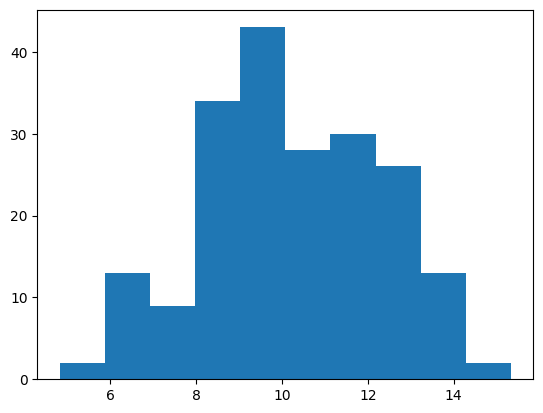

In [220]:
import matplotlib.pyplot as plt
plt.hist(x);